# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

> <font color=blue>_The data represents a collection of 17 marketing campaigns_</font>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [307]:
df = pd.read_csv('C:/Users/kbijjula/OneDrive - Intel Corporation/Documents/Python/AI-course/Module-17/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [308]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [309]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [310]:
# checking for duplicate values
df.duplicated().sum()

12

> <font color=blue>_The dataset consists of 10 categorical data and 10 numerical data with one output/response variable of boolean type. The data is related to direct marketing campaigns, primarily through phone calls, of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y). The categorical variables will need to be encoded into numerical values for further analysis_<br>
_There are no null values and a few duplicates, but several of the categorical variables have values that are "unknown". These will need to be investigated to see if these "unknown" values are valid data or can be eliminated. As stated in the data description, the "duration" column can be dropped_<br></font>

In [311]:
# removing duplicate Values
df = df.drop_duplicates()

In [312]:
# dropping the "duration" column
df = df.drop("duration", axis=1)

### Investigating the "unknown" values

> <font color=blue>_Check the unique values in each categorical column and see if any of the "unknown" values make sense_</font>

In [313]:
#check all the unique values in the categorical columns
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


In [314]:
#listing number of unknown values in each categorical column
for col in category_features:
    print(col, "{", len(df.loc[df[col] == "unknown"]),"}")

job { 330 }
marital { 80 }
education { 1730 }
default { 8596 }
housing { 990 }
loan { 990 }
contact { 0 }
month { 0 }
day_of_week { 0 }
poutcome { 0 }
y { 0 }


> <font color=blue>_The only unknown values that seem ok to drop are the ones in the "marital" column._</font>

In [317]:
#eliminating "unknown" values in the "marital" column
df = df.drop(df[df['marital'] == "unknown"].index)
df=df.reset_index(drop=True)

### Checking the target variable

In [318]:
# how many people(client) have subscribed to a term deposit?    
df.y.value_counts() 

y
no     36469
yes     4627
Name: count, dtype: int64

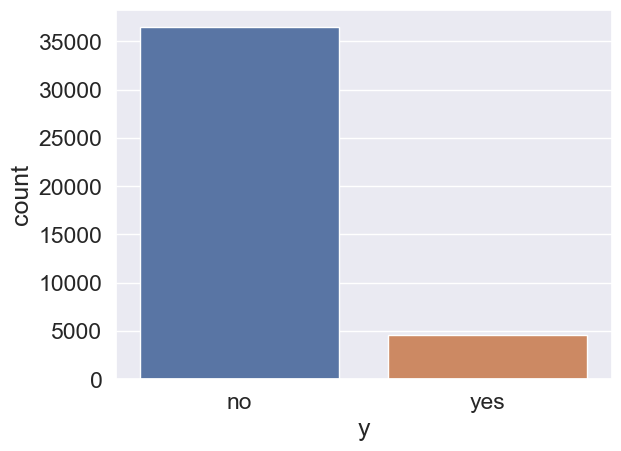

In [319]:
countplt=sns.countplot(x='y', data=df)
plt.show()

> <font color=blue>_The classes in the target variable are highly imbalanced. This will need to be taken into consideration when creating the models_</font>

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41096 entries, 0 to 41095
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41096 non-null  int64  
 1   job             41096 non-null  object 
 2   marital         41096 non-null  object 
 3   education       41096 non-null  object 
 4   default         41096 non-null  object 
 5   housing         41096 non-null  object 
 6   loan            41096 non-null  object 
 7   contact         41096 non-null  object 
 8   month           41096 non-null  object 
 9   day_of_week     41096 non-null  object 
 10  campaign        41096 non-null  int64  
 11  pdays           41096 non-null  int64  
 12  previous        41096 non-null  int64  
 13  poutcome        41096 non-null  object 
 14  emp.var.rate    41096 non-null  float64
 15  cons.price.idx  41096 non-null  float64
 16  cons.conf.idx   41096 non-null  float64
 17  euribor3m       41096 non-null 

> <font color=blue>_The bank in question wants to know what type of customers would want to avail a campaign offer so that it better target their marketing efforts. The goal of this task is to study relevant data modeling techniques that can be used to determine which customer and what market segment would respond positively to promotions and marketing campaigns by the bank._</font>

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [542]:
#keeping columns 1-7 and dropping the rest
dfnew = df[['age','job','marital','education','default','housing','loan','y']].copy()

In [332]:
#replacing the target values - change 'no' and 'yes' to 0 and 1 respectively
dfnew['y'] = dfnew['y'].replace(['no','yes'],[0,1])

In [333]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41096 entries, 0 to 41095
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41096 non-null  int64 
 1   job        41096 non-null  object
 2   marital    41096 non-null  object
 3   education  41096 non-null  object
 4   default    41096 non-null  object
 5   housing    41096 non-null  object
 6   loan       41096 non-null  object
 7   y          41096 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.5+ MB


In [551]:
#Using OneHotEncoding to convert the categorical columns to numerical and scaling the "age" column to lie between 0 and 1
cats = ["job", "marital", "education", "default", "housing", "loan"]
nums = ["age"]


preprocessor = ColumnTransformer(transformers = [('ohe',OneHotEncoder(drop = 'if_binary'), cats),
                                                ('mms', MinMaxScaler(), nums)])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

> <font color=blue>_Since the output variable is highly imbalanced, we will make use of StratifiedShuffleSplit to stpilt the data between test and train sets and maintain the imbalance._</font>

In [448]:
# split the target column to a separate dataframe
X = dfnew.drop(columns='y')
X_features = X.columns.tolist()
y = dfnew['y']

In [449]:
#split dataset into test and train datasets making sure the proportion of the target value remains the same
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [450]:
print("train dataset proportion", y_train.value_counts(normalize=True),'\n')
print("test dataset proportion", y_test.value_counts(normalize=True))

train dataset proportion y
0    0.887395
1    0.112605
Name: proportion, dtype: float64 

test dataset proportion y
0    0.88747
1    0.11253
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [451]:
#For the baseline model, we will check to see the performance of predicting everything to be the majority value 
#(in this case "no")
base_test = np.zeros(len(X_test))

#accuracy,f1 on test data 
accuracy = accuracy_score(y_test, base_test)
f1 = f1_score(y_test, base_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')
print("AUC on Test data is " +str(roc_auc_score(y_test,base_test)))

Accuracy score is: 0.8874695863746959
F1 score is: 0.0
AUC on Test data is 0.5


> <font color=blue>_So the models we will build need to beat the above F1 score and AUC values_</font>

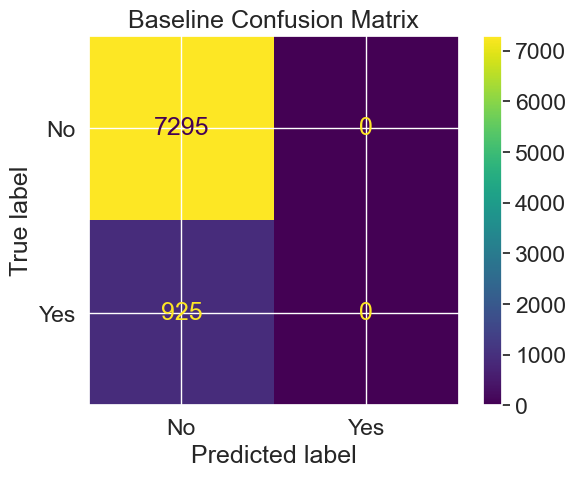

In [452]:

cm = confusion_matrix(y_test, base_test)
plt.title = 'Baseline Confusion Matrix'
classes = ['No', 'Yes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes) 
disp.plot()
disp.ax_.set_title(title)
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [481]:
#creating logistic regression classifier
logreg = LogisticRegression(max_iter=7600, random_state=42)
lr_pipe = Pipeline(steps = [('lrtr', preprocessor), ('lrf', logreg)])
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('lrtr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('mms', MinMaxScaler(),
                                                  ['age'])])),
                ('lrf', LogisticRegression(max_iter=7600, random_state=42))])

In [486]:
ylr_pred = lr_pipe.predict(X_test)

In [487]:
results = cross_validate(lr_pipe, X_train, y_train, return_train_score=True)

In [488]:
results

{'fit_time': array([0.44432783, 0.30045104, 0.39726472, 0.47315741, 0.38512301]),
 'score_time': array([0.02372551, 0.01373625, 0.01654625, 0.02206087, 0.01592946]),
 'test_score': array([0.88731752, 0.88745247, 0.88745247, 0.88745247, 0.88730038]),
 'train_score': array([0.88741445, 0.88738071, 0.88738071, 0.88738071, 0.88741873])}

In [489]:
print("Average Train Score: {:.5f}%".format(results["train_score"].mean()*100))
print("Average Test Score: {:.5f}%".format(results["test_score"].mean()*100))
print("Average train time: {:.5f} s".format(results["fit_time"].mean()))

Average Train Score: 88.73951%
Average Test Score: 88.73951%
Average train time: 0.40006 s


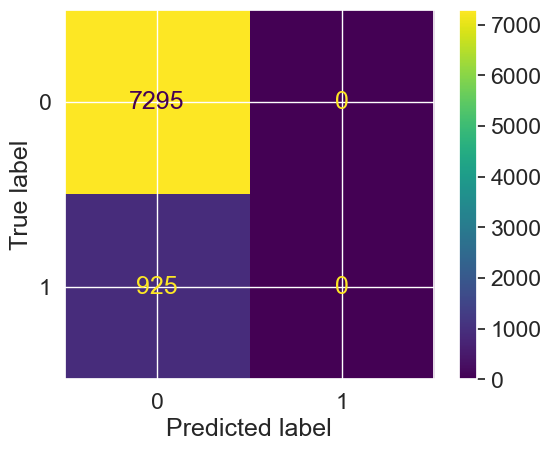

In [509]:
cmlr = confusion_matrix(y_test, ylr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmlr)
disp.plot()
plt.show()

In [492]:
f1_score(y_test, ylr_pred)

0.0

### Problem 9: Score the Model

What is the accuracy of your model?

In [493]:
#Scores for the logistic regression model
print("Average Train Score: {:.5f}%".format(results["train_score"].mean()*100))
print("Average Test Score: {:.5f}%".format(results["test_score"].mean()*100))
print("Average train time: {:.5f} s".format(results["fit_time"].mean()))
print("AUC on Test data is " +str(roc_auc_score(y_test,ylr_pred)))

Average Train Score: 88.73951%
Average Test Score: 88.73951%
Average train time: 0.40006 s
AUC on Test data is 0.5


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [534]:
# Initiate results display dataframe logistic regression data
comparedf = pd.DataFrame(
    {
        "Model": ["Logistic Regression"],
        "Train Time": [results["fit_time"].mean()],
        "Train Accuracy": [results["train_score"].mean()],
        "Test Accuracy": [results["test_score"].mean()],
    }
)
comparedf

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.400065,0.887395,0.887395


### KNN classifier

In [497]:
# creating knn classifier
knn_pipe = Pipeline([('knntr', preprocessor), ('knn', KNeighborsClassifier())])

In [498]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('knntr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('mms', MinMaxScaler(),
                                                  ['age'])])),
                ('knn', KNeighborsClassifier())])

In [500]:
yknn_pred = knn_pipe.predict(X_test)

In [501]:
resultsknn = cross_validate(knn_pipe, X_train, y_train, return_train_score=True)

In [502]:
print("Average Train Score: {:.5f}%".format(resultsknn["train_score"].mean()*100))
print("Average Test Score: {:.5f}%".format(resultsknn["test_score"].mean()*100))
print("Average train time: {:.5f} s".format(resultsknn["fit_time"].mean()))

Average Train Score: 88.86878%
Average Test Score: 87.55019%
Average train time: 0.14453 s


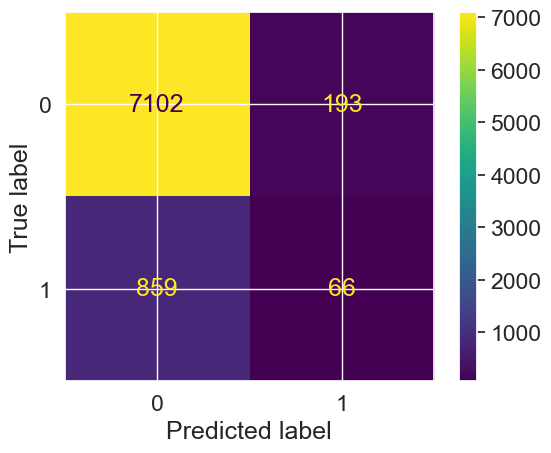

In [511]:
cmknn = confusion_matrix(y_test, yknn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmknn)
disp.plot()
plt.show()

In [535]:
row1 = pd.Series(["KNN", resultsknn["fit_time"].mean(), resultsknn["train_score"].mean(), 
                    resultsknn["test_score"].mean()], index=comparedf.columns)
comparedf = comparedf._append(row1,ignore_index=True) 
comparedf

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.400065,0.887395,0.887395
1,KNN,0.144535,0.888688,0.875502


### Decision Tree

In [517]:
# creating decision tree classifier
dt_pipe = Pipeline([('dttr', preprocessor), ('dt', DecisionTreeClassifier())])

In [518]:
dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('dttr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('mms', MinMaxScaler(),
                                                  ['age'])])),
                ('dt', DecisionTreeClassifier())])

In [519]:
ydt_pred = dt_pipe.predict(X_test)

In [520]:
resultsdt = cross_validate(dt_pipe, X_train, y_train, return_train_score=True)

In [521]:
print("Average Train Score: {:.5f}%".format(resultsdt["train_score"].mean()*100))
print("Average Test Score: {:.5f}%".format(resultsdt["test_score"].mean()*100))
print("Average train time: {:.5f} s".format(resultsdt["fit_time"].mean()))

Average Train Score: 91.95766%
Average Test Score: 86.29090%
Average train time: 0.88320 s


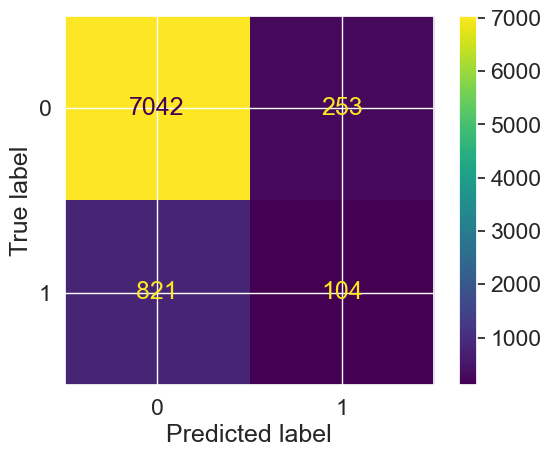

In [522]:
cmdt = confusion_matrix(y_test, ydt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmdt)
disp.plot()
plt.show()

In [536]:
row2 = pd.Series(["Decision Tree", resultsdt["fit_time"].mean(), resultsdt["train_score"].mean(), 
                    resultsdt["test_score"].mean()], index=comparedf.columns)
comparedf = comparedf._append(row2,ignore_index=True) 
comparedf

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.400065,0.887395,0.887395
1,KNN,0.144535,0.888688,0.875502
2,Decision Tree,0.883198,0.919577,0.862909


### SVM

In [525]:
# creating SVC classifier
svc_pipe = Pipeline([('svctr', preprocessor), ('svc', SVC())])

In [526]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('svctr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('mms', MinMaxScaler(),
                                                  ['age'])])),
                ('svc', SVC())])

In [527]:
ysvc_pred = svc_pipe.predict(X_test)

In [528]:
resultssvc = cross_validate(svc_pipe, X_train, y_train, return_train_score=True)

In [529]:
print("Average Train Score: {:.5f}%".format(resultssvc["train_score"].mean()*100))
print("Average Test Score: {:.5f}%".format(resultssvc["test_score"].mean()*100))
print("Average train time: {:.5f} s".format(resultssvc["fit_time"].mean()))

Average Train Score: 88.73951%
Average Test Score: 88.73951%
Average train time: 43.66109 s


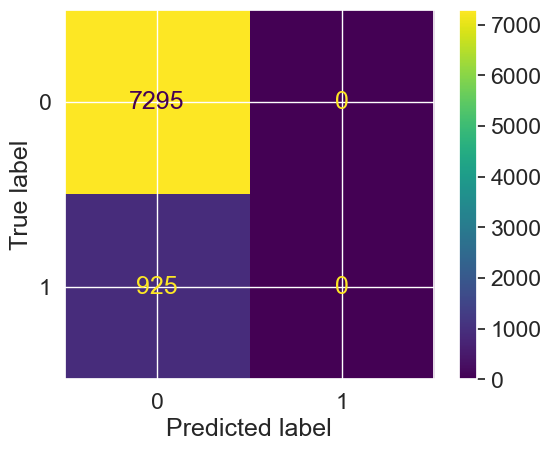

In [530]:
cmsvc = confusion_matrix(y_test, ysvc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvc)
disp.plot()
plt.show()

In [537]:
row3 = pd.Series(["SVM", resultssvc["fit_time"].mean(), resultssvc["train_score"].mean(), 
                    resultssvc["test_score"].mean()], index=comparedf.columns)
comparedf = comparedf._append(row3,ignore_index=True) 
comparedf

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.400065,0.887395,0.887395
1,KNN,0.144535,0.888688,0.875502
2,Decision Tree,0.883198,0.919577,0.862909
3,SVM,43.661089,0.887395,0.887395


> <font color=blue>_Comparing the models, none of them seem to do better than the baseline model in terms of accuracy. The Logistic Regression and SVM models predict all reslts to be "No". Between the KNN and Decision Tree, the KNN seems to perform better on the Test dataset_</font>

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

> <font color=blue>_the first point to explore is to remove all rows that have "unknown" values in the dataset_</font>

In [543]:
dfnounk =  df[(df.iloc[:, :] != "unknown").all(axis=1)]

In [544]:
#keeping columns 1-7 and dropping the rest
dfnew1 = dfnounk[['age','job','marital','education','default','housing','loan','y']].copy()
dfnew1['y'] = dfnew1['y'].replace(['no','yes'],[0,1])

In [545]:
# split the target column to a separate dataframe
X = dfnew1.drop(columns='y')
X_features = X.columns.tolist()
y = dfnew1['y']

#split dataset into test and train datasets making sure the proportion of the target value remains the same
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### baseline model after removing all "unknown" values

In [546]:
#For the baseline model, we will check to see the performance of predicting everything to be the majority value 
#(in this case "no")
base_test = np.zeros(len(X_test))

#accuracy,f1 on test data 
accuracy = accuracy_score(y_test, base_test)
f1 = f1_score(y_test, base_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')
print("AUC on Test data is " +str(roc_auc_score(y_test,base_test)))

Accuracy score is: 0.8733595800524935
F1 score is: 0.0
AUC on Test data is 0.5


In [606]:
# Initiate results for display dataframe
comparedf1 = pd.DataFrame(
    {
        "Model": [],
        "Train Time": [],
        "Train Accuracy": [],
        "Test Accuracy": [],
    }
)
comparedf1

,Model,Train Time,Train Accuracy,Test Accuracy


### Logistic Regression with grid search to tune hyperparameters

In [584]:
#creating logistic regression classifier
grid = {'lrf__C':[0.5,1],
       'lrf__max_iter':[1750,2000],
       'lrf__class_weight':[None, 'balanced'],
       'lrf__tol':[0.0001,0.01,0.1]}

logreg = LogisticRegression(random_state=42, solver='saga')
lr_pipe1 = Pipeline(steps = [('lrtr', preprocessor), ('lrf', logreg)])
grid_search_lr = GridSearchCV(estimator=lr_pipe1, param_grid=grid, cv=3, return_train_score=True, error_score="raise")
grid_search_lr.fit(X_train,y_train)

ylr_pred1 = grid_search_lr.predict(X_test)

Best parameters for Logistic Regression 
 {'lrf__C': 0.5, 'lrf__class_weight': None, 'lrf__max_iter': 1750, 'lrf__tol': 0.0001} 

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    2.096696        0.873431       0.873431


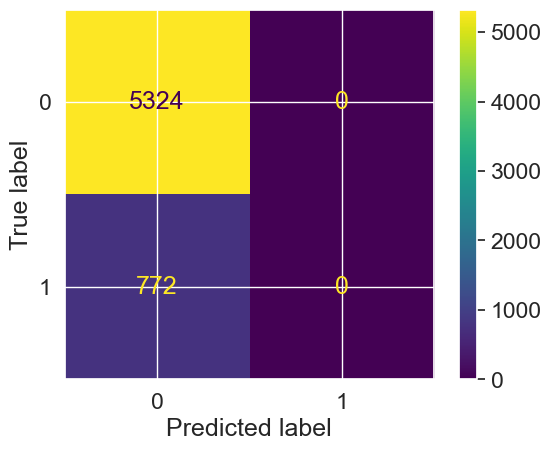

In [607]:
print("Best parameters for Logistic Regression \n", grid_search_lr.best_params_,"\n")

row0 = pd.Series(["Logistic Regression", grid_search_lr.cv_results_["mean_fit_time"][grid_search_lr.best_index_], 
                  grid_search_lr.cv_results_["mean_train_score"][grid_search_lr.best_index_],
                  grid_search_lr.cv_results_["mean_test_score"][grid_search_lr.best_index_]], index=comparedf.columns)

comparedf1 = comparedf1._append(row0,ignore_index=True) 
print(comparedf1)

cmlr1 = confusion_matrix(y_test, ylr_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cmlr1)
disp.plot()
plt.show()

### KNN with grid search to tune hyperparameters

In [593]:
#creating knn classifier
params = {'knn__n_neighbors': list(range(1, 4, 1))}

knn_pipe1 = Pipeline([('knntr', preprocessor), ('knn', KNeighborsClassifier())])

grid_search_knn = GridSearchCV(estimator=knn_pipe1, param_grid=params, cv=3,return_train_score=True)
grid_search_knn.fit(X_train,y_train)

yknn_pred1 = grid_search_knn.predict(X_test)

Best parameters for KNN {'knn__n_neighbors': 2} 


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    2.096696        0.873431       0.873431
1                  KNN    0.044364        0.879132       0.861783


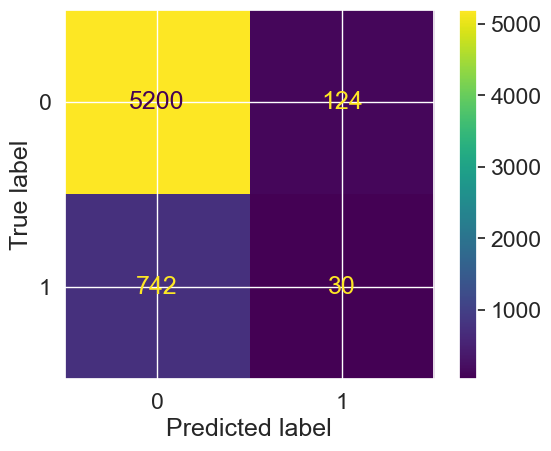

In [608]:
print("Best parameters for KNN", grid_search_knn.best_params_, "\n\n")

row1 = pd.Series(["KNN", grid_search_knn.cv_results_["mean_fit_time"][grid_search_knn.best_index_], 
                  grid_search_knn.cv_results_["mean_train_score"][grid_search_knn.best_index_],
                  grid_search_knn.cv_results_["mean_test_score"][grid_search_knn.best_index_]], index=comparedf.columns)

comparedf1 = comparedf1._append(row1,ignore_index=True) 
print(comparedf1)

cmknn1 = confusion_matrix(y_test, yknn_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cmknn1)
disp.plot()
plt.show()

In [599]:
#creating decision tree classifier
paramsdtt = {'clf__max_depth': range(1,15),
         'clf__min_samples_split': [2,3,5,10],
          'clf__criterion': ['gini','entropy'],
          'clf__min_samples_leaf': [1,2,3]
         }

dtt_pipe = Pipeline([('dtttr', preprocessor), ('clf', DecisionTreeClassifier())])

grid_search_dtt = GridSearchCV(estimator=dtt_pipe, param_grid=paramsdtt, cv=3,return_train_score=True)
grid_search_dtt.fit(X_train,y_train)

ydtt_pred1 = grid_search_dtt.predict(X_test)

Best parameters for Decision Tree {'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    2.096696        0.873431       0.873431
1                  KNN    0.044364        0.879132       0.861783
2        Decision Tree    0.088050        0.873431       0.873431


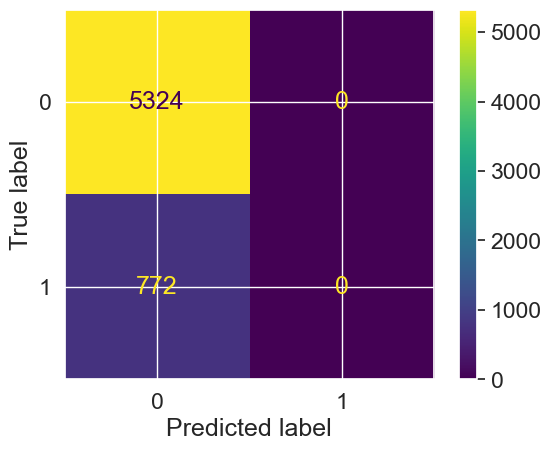

In [609]:
print("Best parameters for Decision Tree", grid_search_dtt.best_params_)

row1 = pd.Series(["Decision Tree", grid_search_dtt.cv_results_["mean_fit_time"][grid_search_dtt.best_index_], 
                  grid_search_dtt.cv_results_["mean_train_score"][grid_search_dtt.best_index_],
                  grid_search_dtt.cv_results_["mean_test_score"][grid_search_dtt.best_index_]], index=comparedf.columns)

comparedf1 = comparedf1._append(row1,ignore_index=True) 
print(comparedf1)

cmdtt1 = confusion_matrix(y_test, ydtt_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cmdtt1)
disp.plot()
plt.show()

> <font color=blue>_After fine tuning the hyperparameters, the only model that seems to work is KNN with 2 neighbors. The accuracy of the models degrade when we remove the "unknown" values. The models can be refined further by considering the whole dataset_</font>

##### Questions